# Dividends Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# yahoo finance data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Online Gaming
title = "Dividends"
symbols = ['BMY', 'MED', 'ET', 'BTI', 'ABBV', 'T', 'DFS', 'JNJ', 'BEP', 'PEAK', 'DUK', 'NTES', 'INTC', 'MCD', 'NVS']
start = '2016-01-01'
end = '2020-06-26'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
4 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

1634

In [7]:
df.head()

,BMY,MED,ET,BTI,ABBV,T,DFS,JNJ,BEP,PEAK,DUK,NTES,INTC,MCD,NVS
Date,,,,,,,,,,,,,,,
2016-01-04,58.966171,25.097445,9.600537,42.963787,46.704380,26.815956,47.670143,88.997742,18.515593,27.372549,58.656158,159.800079,30.134039,104.540825,63.856762
2016-01-05,60.127369,25.483688,9.539128,43.054810,46.509811,27.003315,47.561607,89.369743,18.682926,27.966824,59.076370,161.415497,29.992189,105.981186,64.199318
2016-01-06,59.071739,25.782158,8.140328,42.967743,46.517910,26.963728,46.630093,88.918037,18.428286,26.842705,59.208195,161.239090,29.327276,105.269913,63.320580
2016-01-07,57.435497,24.983324,7.205522,41.998138,46.380096,26.528322,45.761887,87.881737,17.417028,26.126715,58.664391,153.533188,28.227942,102.833771,62.508881
2016-01-08,55.975193,24.526846,7.382930,41.424274,45.115398,26.552073,45.192127,86.942871,17.162388,26.055111,58.532570,151.759918,27.935379,102.673721,60.736530


In [8]:
df.tail()

,BMY,MED,ET,BTI,ABBV,T,DFS,JNJ,BEP,PEAK,DUK,NTES,INTC,MCD,NVS
Date,,,,,,,,,,,,,,,
2020-06-19,55.982868,117.700676,7.97,39.169998,96.709999,30.309999,53.730000,143.830002,48.970001,26.320000,82.110001,413.209991,59.619999,186.559998,91.099998
2020-06-22,57.124161,119.227448,7.93,39.709999,97.269997,30.110001,54.020000,143.389999,49.570000,26.870001,82.529999,418.200012,60.090000,187.460007,90.620003
2020-06-23,57.937950,124.878510,7.88,39.680000,97.309998,30.250000,54.860001,142.860001,48.980000,26.969999,81.849998,435.070007,59.919998,186.619995,90.459999
2020-06-24,57.322643,121.953842,7.48,38.139999,95.139999,29.420000,50.810001,139.820007,47.580002,25.990000,80.470001,437.459991,59.090000,184.289993,88.800003
2020-06-25,57.739464,129.924805,7.41,39.310001,96.989998,29.719999,52.060001,139.669998,48.290001,26.590000,79.449997,436.059998,58.509998,182.759995,89.599998


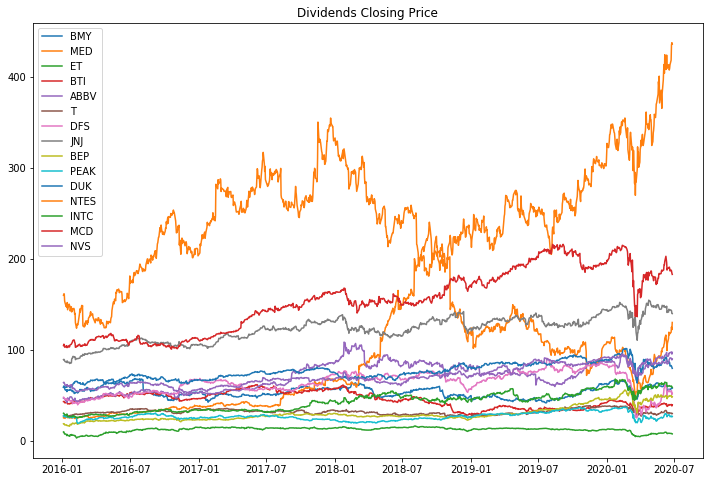

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title(title + ' Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

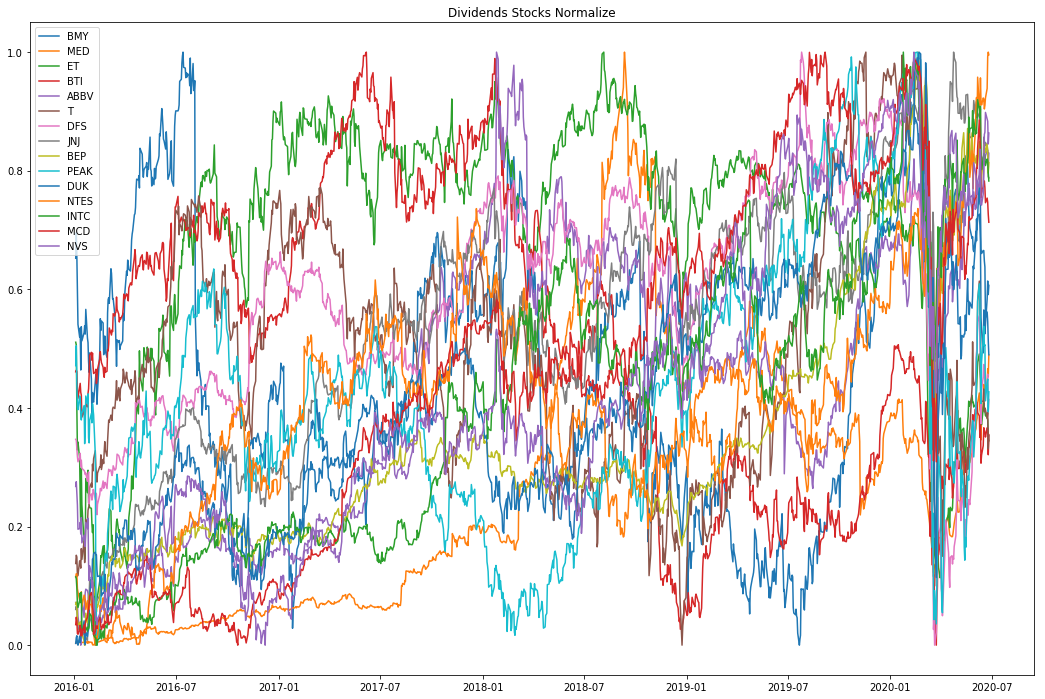

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title(title + ' Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

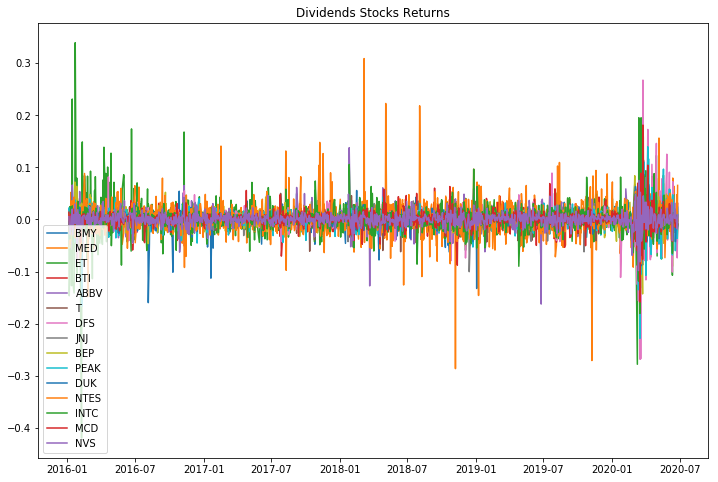

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title(title + ' Stocks Returns')
plt.legend(labels=stock_rets.columns)

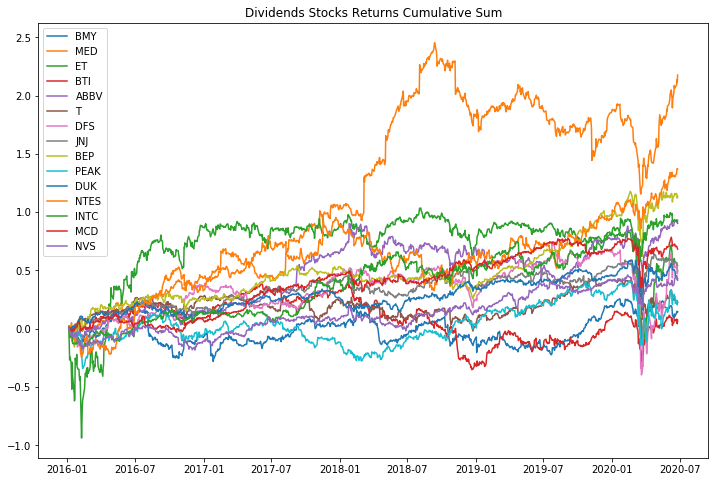

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title(title + ' Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

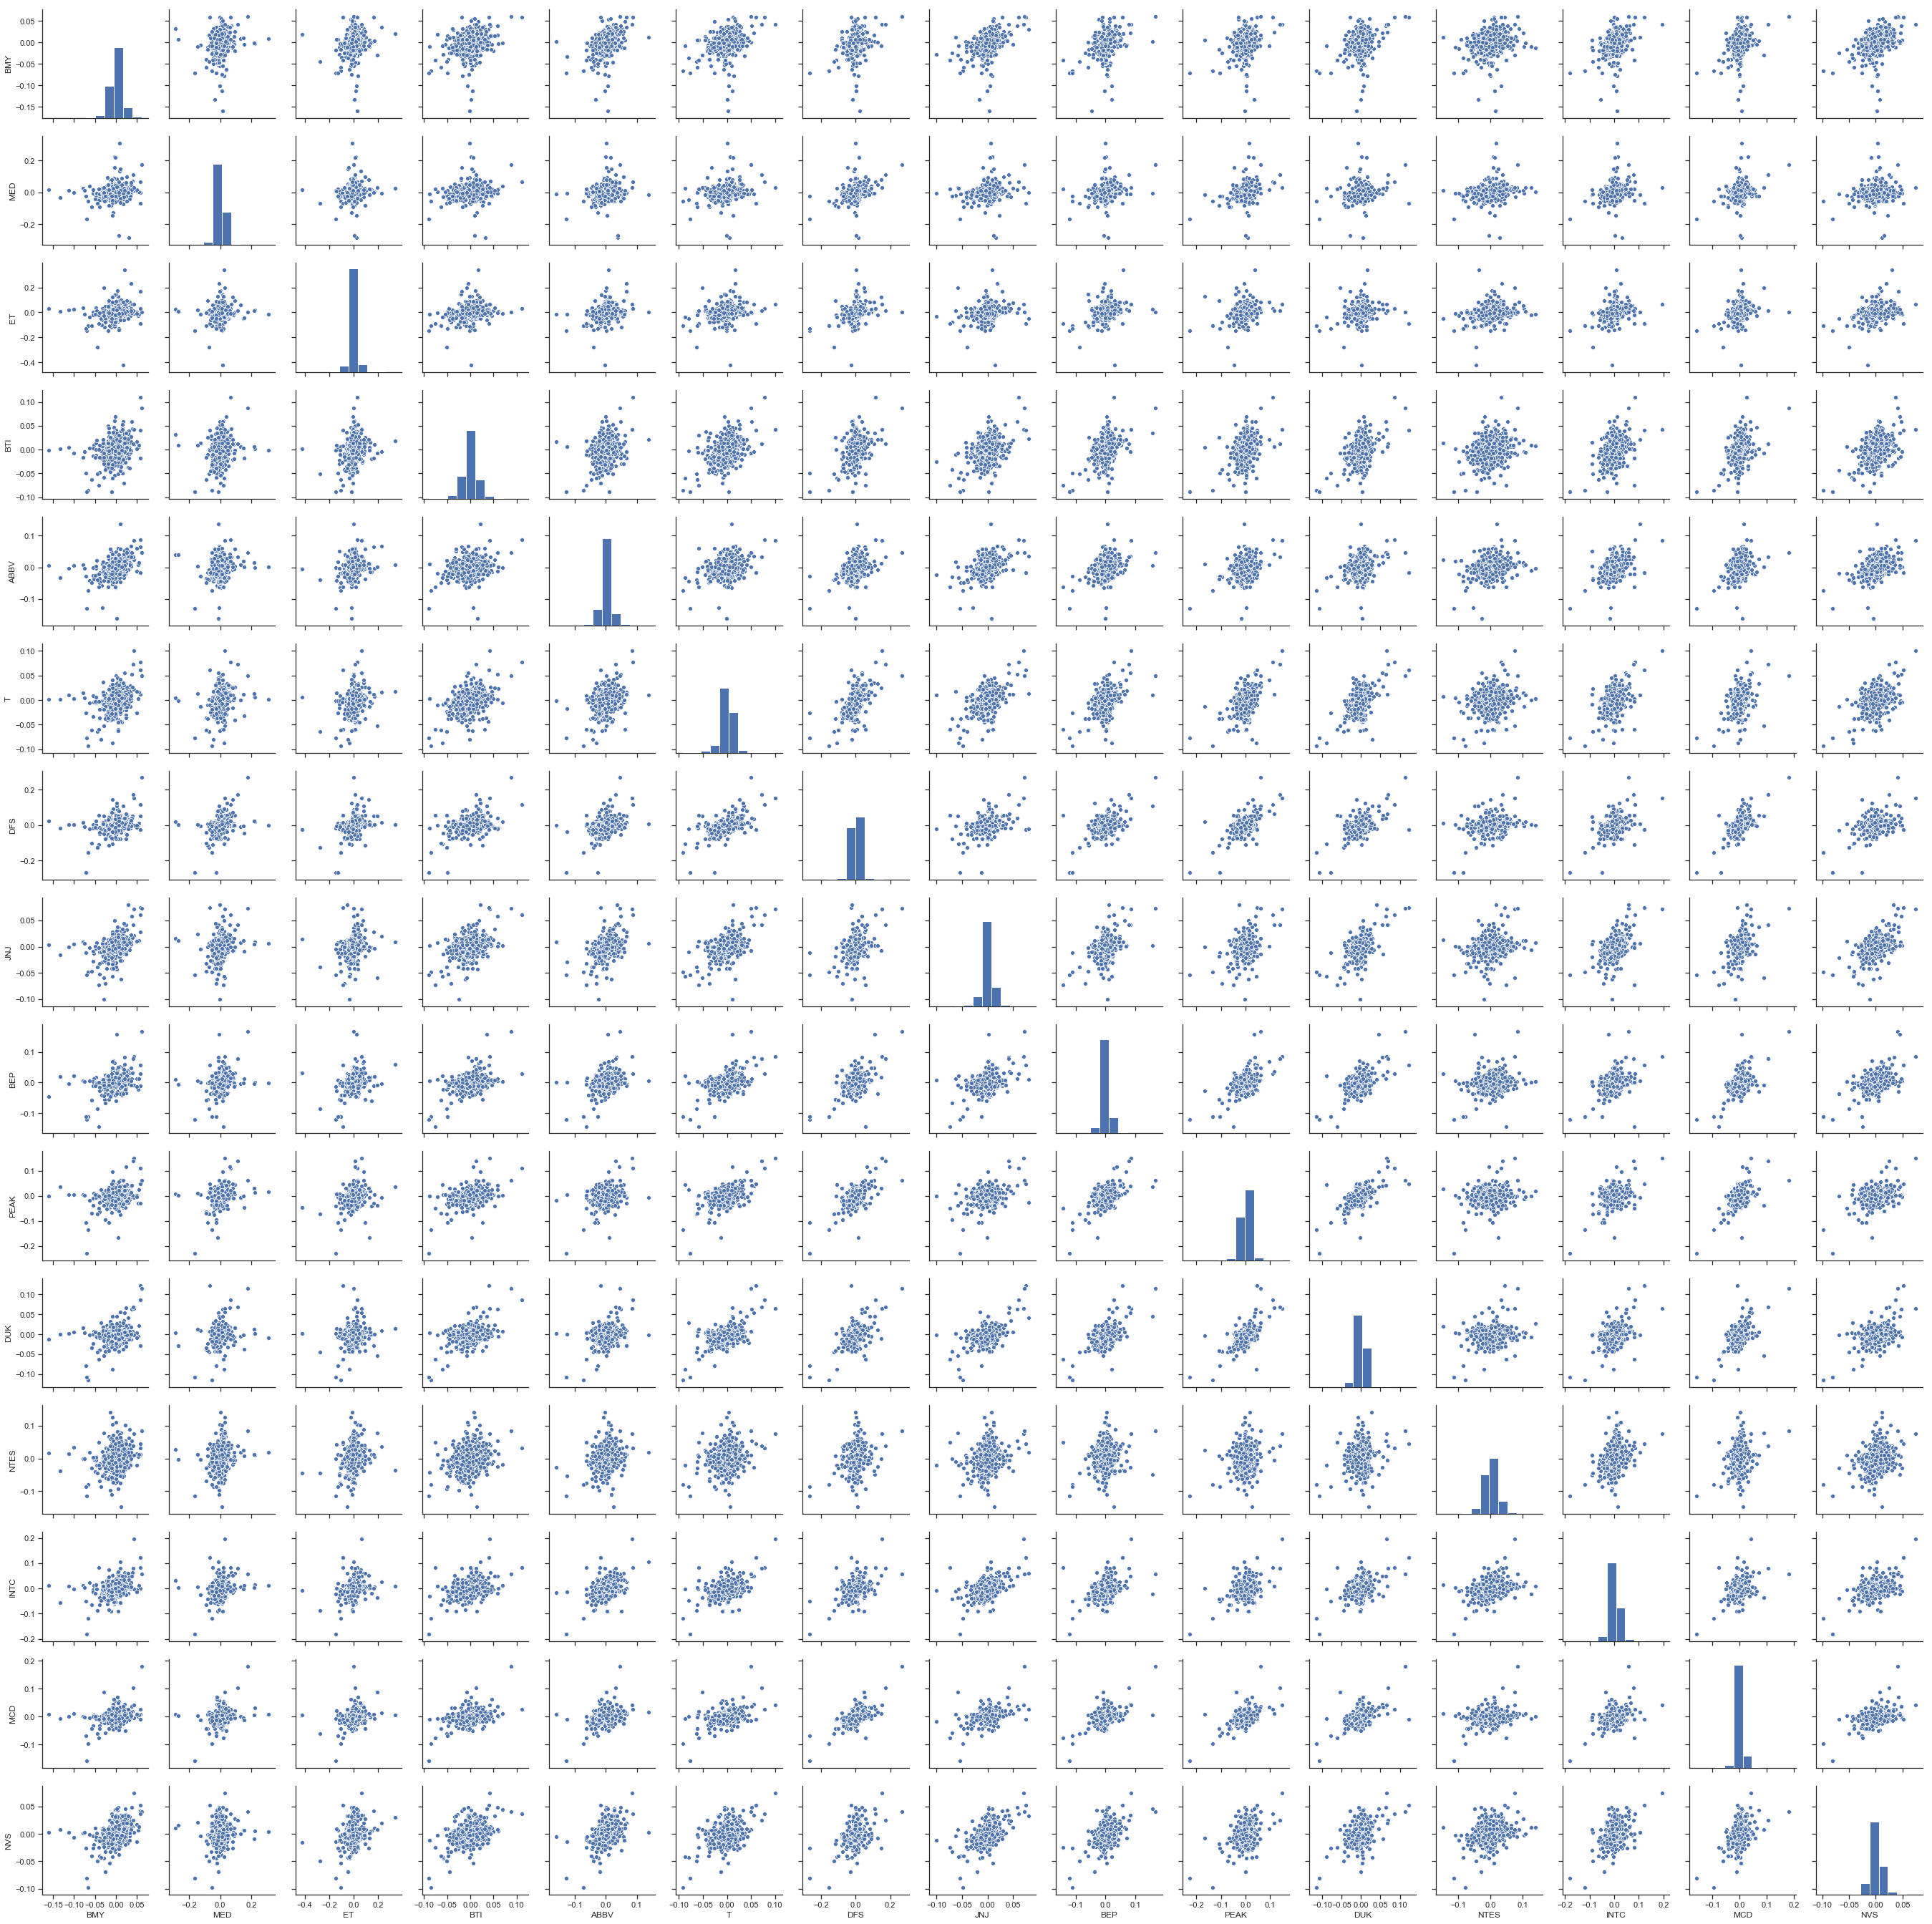

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

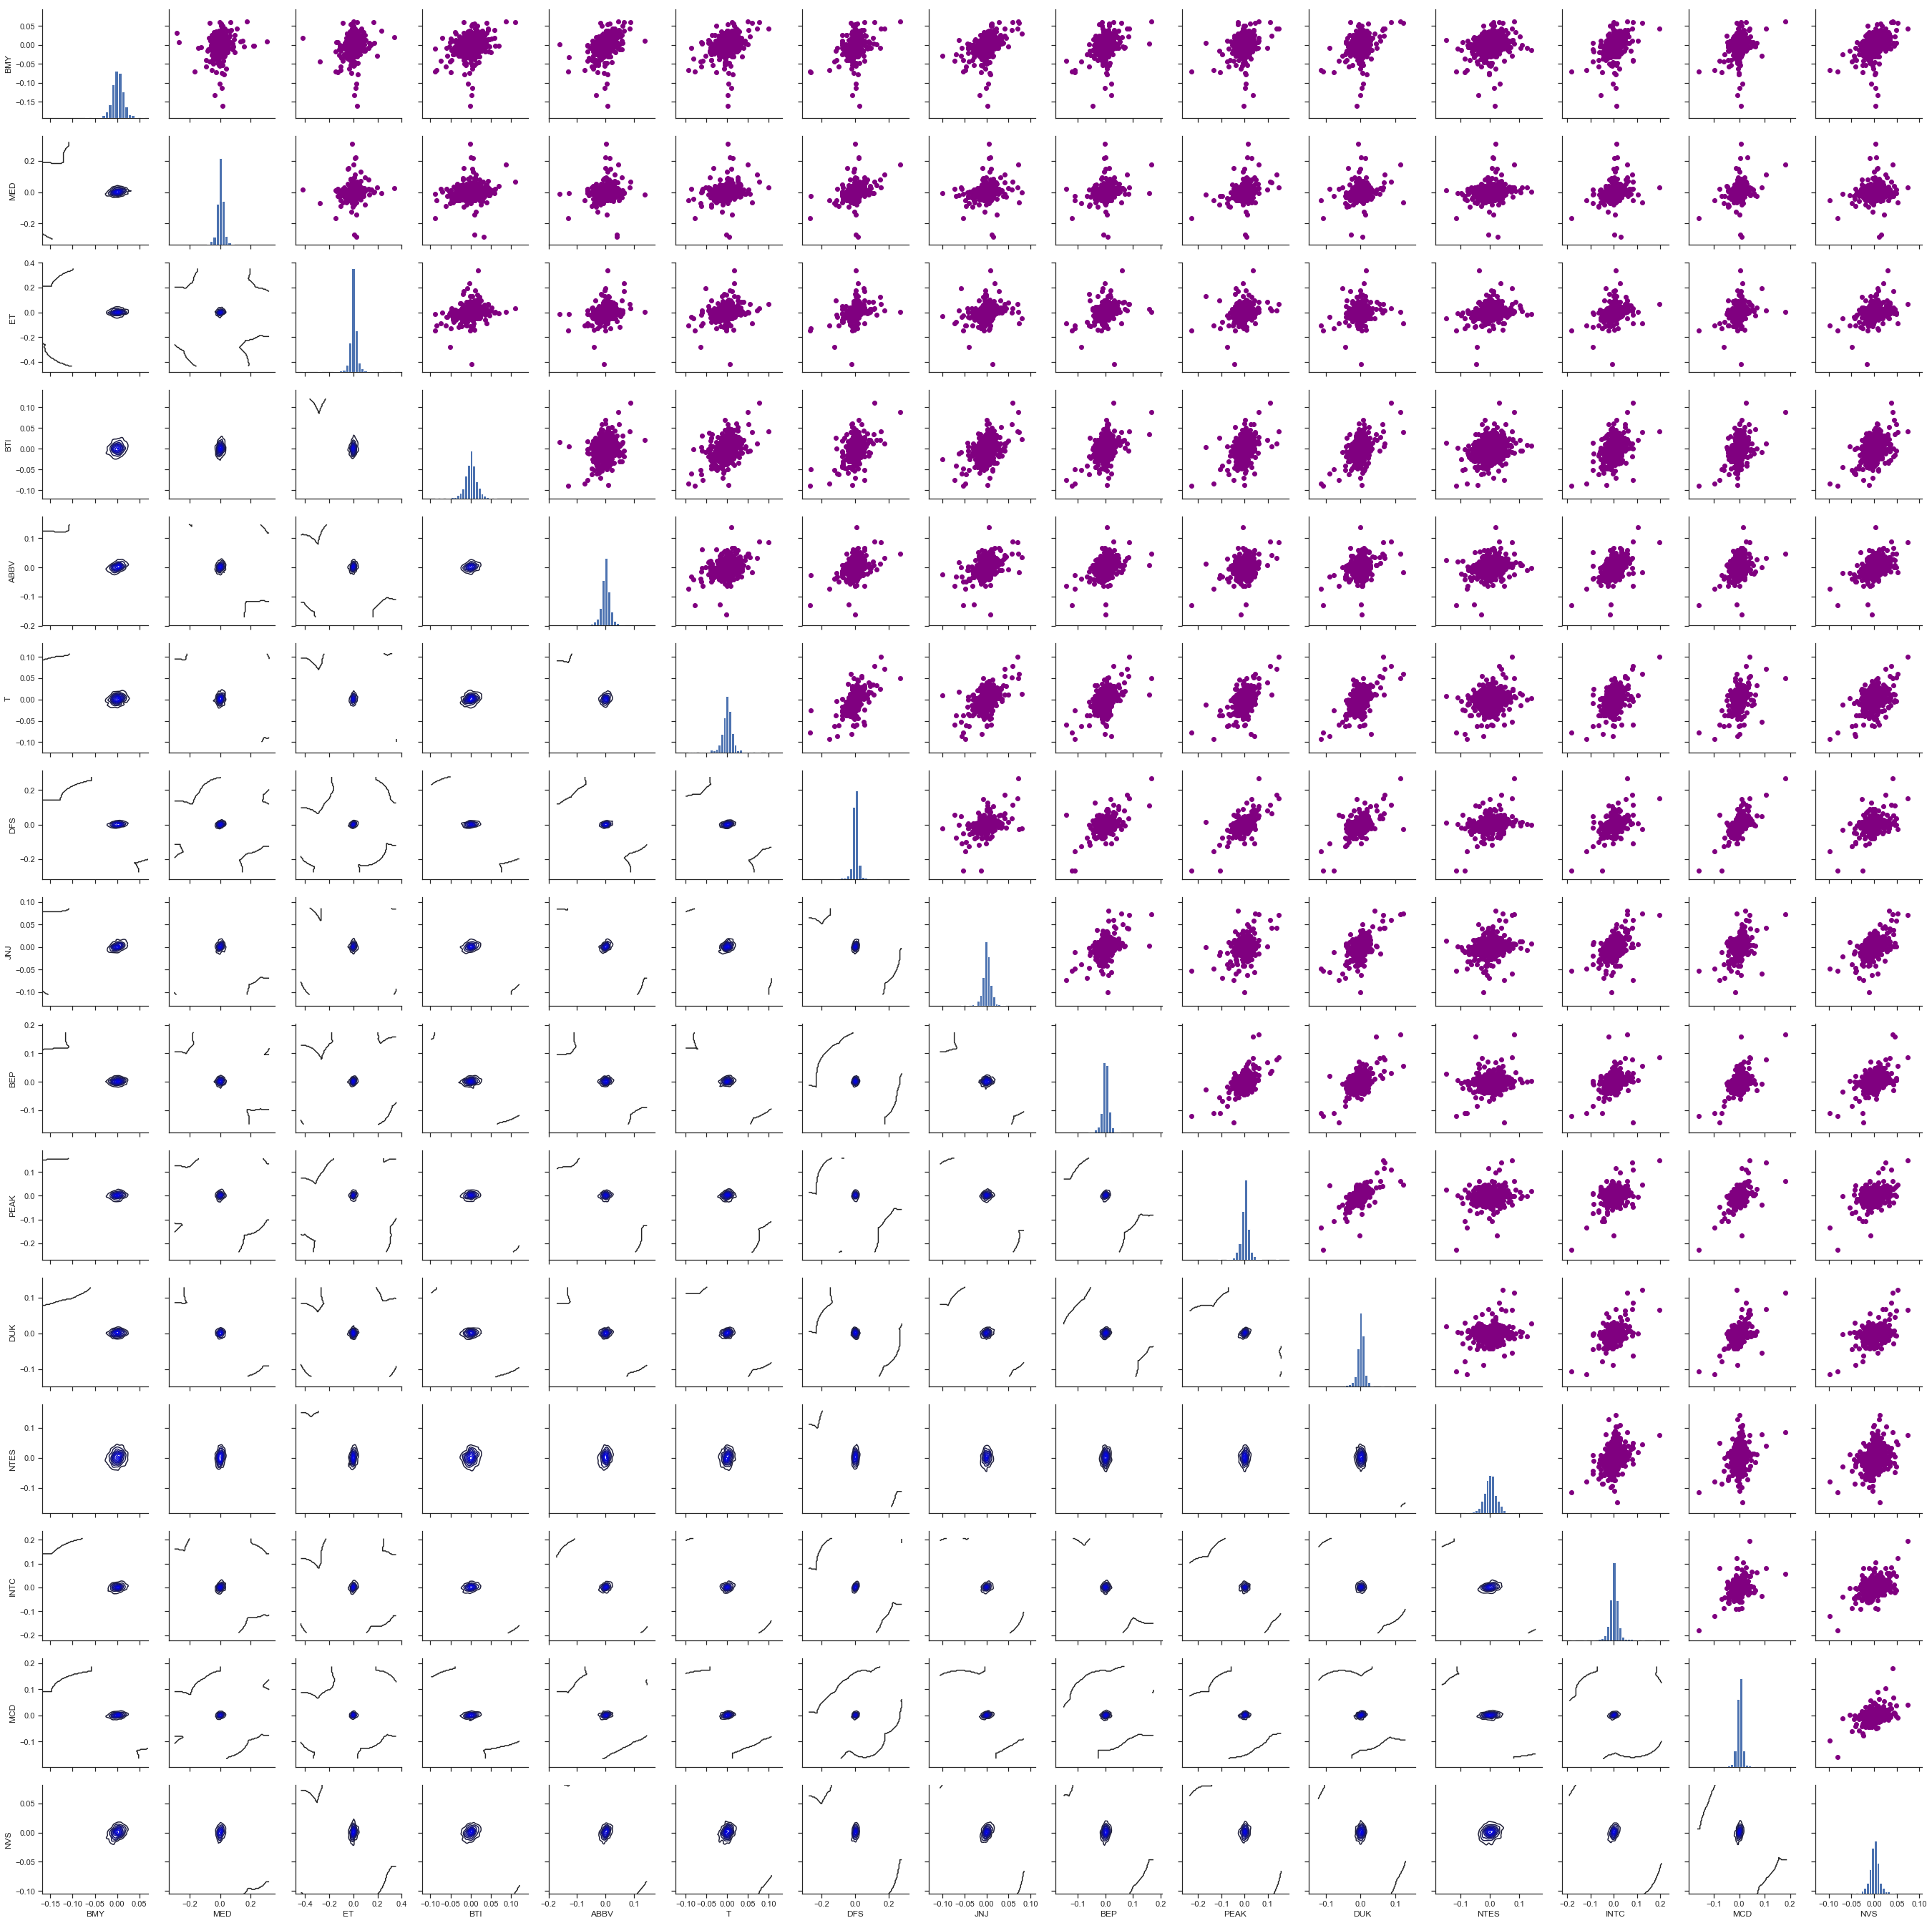

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

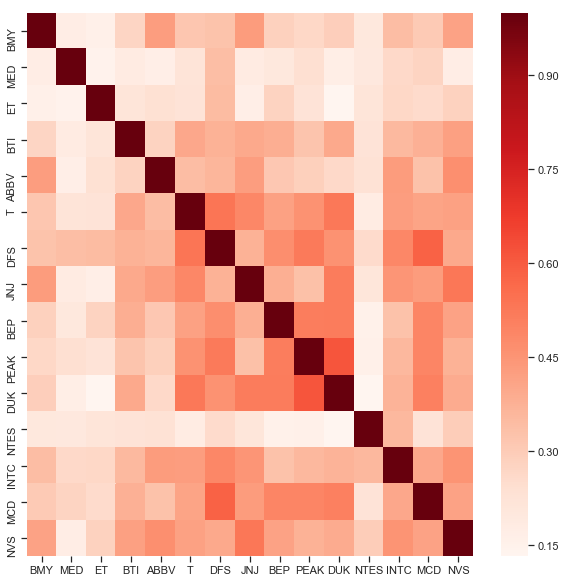

In [17]:
plt.figure(figsize=(10,10))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

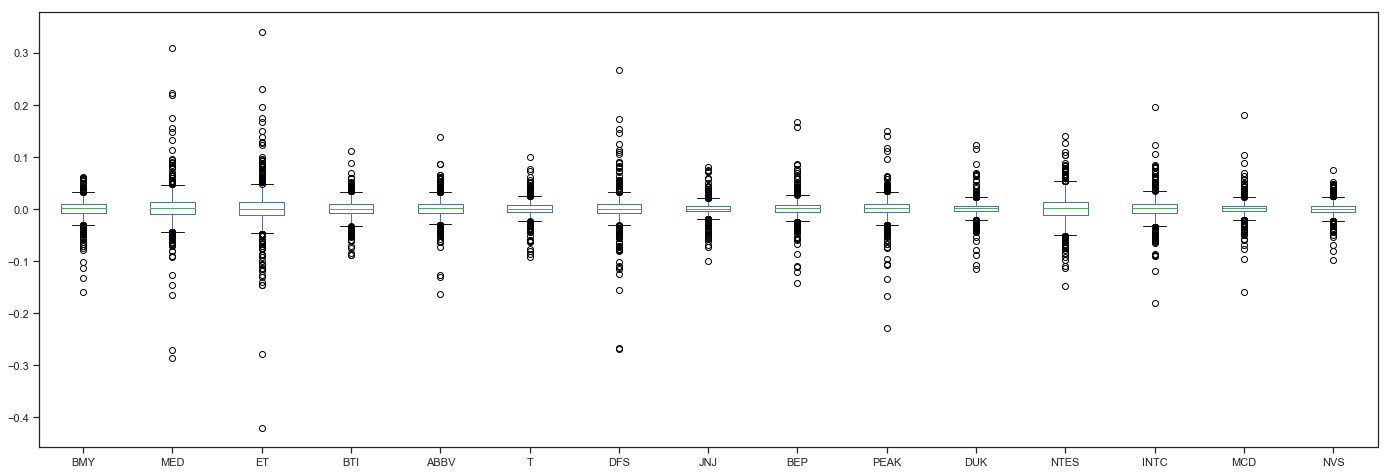

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(24,8))

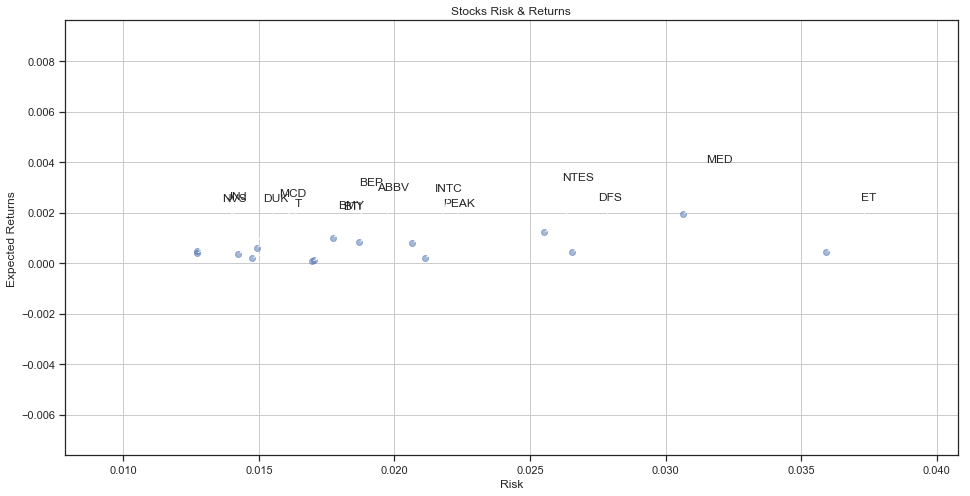

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.std(), rets.mean()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

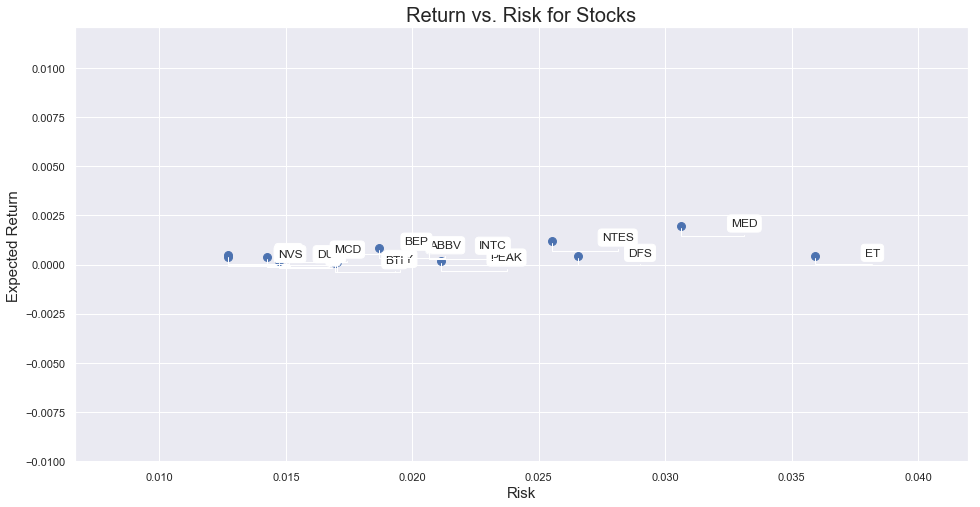

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(16,8))
plt.scatter(rets.std(), rets.mean(), s=area)
plt.xlabel("Risk", fontsize=15)
plt.ylabel("Expected Return", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.std(), rets.mean()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
def annual_risk_return(stock_rets):
    tradeoff = stock_rets.agg(["mean", "std"]).T
    tradeoff.columns = ["Return", "Risk"]
    tradeoff.Return = tradeoff.Return*252
    tradeoff.Risk = tradeoff.Risk * np.sqrt(252)
    return tradeoff

In [22]:
tradeoff = annual_risk_return(stock_rets)
tradeoff

,Return,Risk
BMY,0.032710,0.270447
MED,0.486789,0.486225
ET,0.111224,0.570211
BTI,0.016424,0.269174
ABBV,0.207893,0.296661
T,0.050530,0.234043
DFS,0.110700,0.421576
JNJ,0.121264,0.202031
BEP,0.253928,0.281216
PEAK,0.051073,0.335242


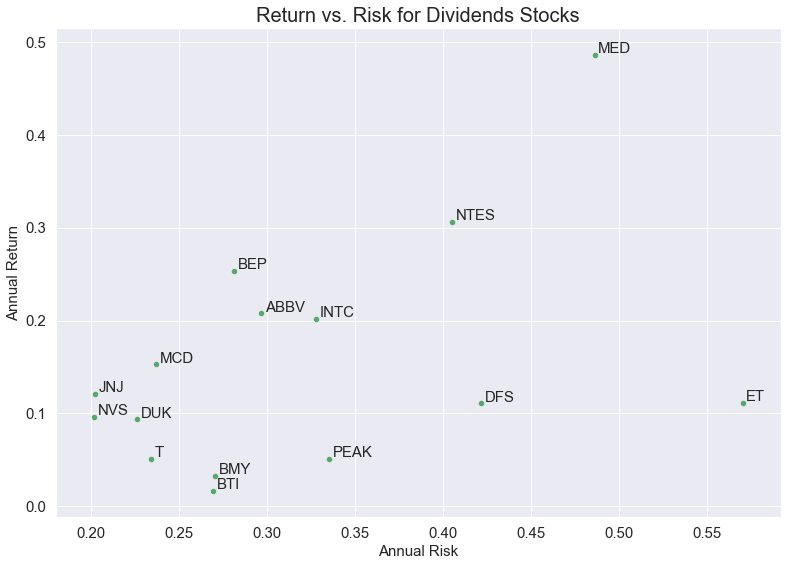

In [23]:
import itertools

colors = itertools.cycle(["r", "b", "g"])

tradeoff.plot(x = "Risk", y = "Return", kind = "scatter", figsize = (13,9), s = 20, fontsize = 15, c='g')
for i in tradeoff.index:
    plt.annotate(i, xy=(tradeoff.loc[i, "Risk"]+0.002, tradeoff.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Return vs. Risk for " + title + " Stocks", fontsize = 20)
plt.show()

In [24]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

NVS   NVS     1.000000
MCD   MCD     1.000000
MED   MED     1.000000
ET    ET      1.000000
BTI   BTI     1.000000
ABBV  ABBV    1.000000
T     T       1.000000
DFS   DFS     1.000000
BEP   BEP     1.000000
PEAK  PEAK    1.000000
DUK   DUK     1.000000
NTES  NTES    1.000000
INTC  INTC    1.000000
JNJ   JNJ     1.000000
BMY   BMY     1.000000
DUK   PEAK    0.615049
PEAK  DUK     0.615049
MCD   DFS     0.584761
DFS   MCD     0.584761
      T       0.538436
T     DFS     0.538436
NVS   JNJ     0.532011
JNJ   NVS     0.532011
T     DUK     0.528277
DUK   T       0.528277
PEAK  DFS     0.522560
DFS   PEAK    0.522560
DUK   BEP     0.517638
BEP   DUK     0.517638
DUK   JNJ     0.515478
                ...   
NTES  MED     0.198824
MED   NTES    0.198824
      BTI     0.185314
BTI   MED     0.185314
JNJ   MED     0.184951
MED   JNJ     0.184951
T     NTES    0.181377
NTES  T       0.181377
MED   BMY     0.176019
BMY   MED     0.176019
MED   NVS     0.175026
NVS   MED     0.175026
MED   DUK  

In [25]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,BMY,MED,ET,BTI,ABBV,T,DFS,JNJ,BEP,PEAK,DUK,NTES,INTC,MCD,NVS
Date,,,,,,,,,,,,,,,
2016-01-05,0.812202,0.507112,0.544536,0.455302,0.527513,0.515990,0.496509,0.579734,0.490655,0.662871,0.513318,0.547433,0.467771,0.507434,0.598767
2016-01-06,0.643698,0.500935,0.359797,0.434527,0.541971,0.472109,0.464210,0.528534,0.417512,0.498766,0.492596,0.508655,0.421283,0.447172,0.488666
2016-01-07,0.597816,0.429222,0.401689,0.331459,0.531522,0.395893,0.466014,0.491939,0.284418,0.534609,0.444635,0.346997,0.380510,0.398848,0.493686
2016-01-08,0.608103,0.450574,0.585396,0.376120,0.450557,0.484367,0.477524,0.497324,0.414315,0.598053,0.473781,0.472456,0.452711,0.462334,0.403912
2016-01-11,0.676908,0.569031,0.488437,0.524241,0.435441,0.543179,0.520176,0.523231,0.471068,0.646842,0.529940,0.413538,0.526771,0.497728,0.573435


In [26]:
Normalized_Value.corr()

,BMY,MED,ET,BTI,ABBV,T,DFS,JNJ,BEP,PEAK,DUK,NTES,INTC,MCD,NVS
BMY,1.000000,0.176019,0.156688,0.274713,0.428229,0.315677,0.329028,0.433536,0.285307,0.266100,0.294208,0.202021,0.344809,0.307445,0.417191
MED,0.176019,1.000000,0.148256,0.185314,0.169227,0.221331,0.341120,0.184951,0.203276,0.242135,0.170286,0.198824,0.261545,0.277890,0.175026
ET,0.156688,0.148256,1.000000,0.215051,0.239781,0.225168,0.347858,0.167954,0.281581,0.226392,0.132593,0.214664,0.266627,0.257210,0.284873
BTI,0.274713,0.185314,0.215051,1.000000,0.278377,0.400323,0.375725,0.398718,0.383593,0.324905,0.399913,0.225768,0.353805,0.377765,0.423170
ABBV,0.428229,0.169227,0.239781,0.278377,1.000000,0.344304,0.366218,0.429556,0.315016,0.291593,0.264189,0.233399,0.431927,0.331932,0.465002
T,0.315677,0.221331,0.225168,0.400323,0.344304,1.000000,0.538436,0.486676,0.420033,0.459280,0.528277,0.181377,0.428237,0.413158,0.420342
DFS,0.329028,0.341120,0.347858,0.375725,0.366218,0.538436,1.000000,0.374964,0.470334,0.522560,0.459353,0.256752,0.488283,0.584761,0.397743
JNJ,0.433536,0.184951,0.167954,0.398718,0.429556,0.486676,0.374964,1.000000,0.383020,0.333879,0.515478,0.210772,0.448071,0.433855,0.532011
BEP,0.285307,0.203276,0.281581,0.383593,0.315016,0.420033,0.470334,0.383020,1.000000,0.513561,0.517638,0.153414,0.330229,0.492364,0.415699
PEAK,0.266100,0.242135,0.226392,0.324905,0.291593,0.459280,0.522560,0.333879,0.513561,1.000000,0.615049,0.157801,0.358384,0.492864,0.376026


In [27]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

NVS   NVS     1.000000
MCD   MCD     1.000000
MED   MED     1.000000
ET    ET      1.000000
BTI   BTI     1.000000
ABBV  ABBV    1.000000
T     T       1.000000
DFS   DFS     1.000000
BEP   BEP     1.000000
PEAK  PEAK    1.000000
DUK   DUK     1.000000
NTES  NTES    1.000000
INTC  INTC    1.000000
JNJ   JNJ     1.000000
BMY   BMY     1.000000
DUK   PEAK    0.615049
PEAK  DUK     0.615049
MCD   DFS     0.584761
DFS   MCD     0.584761
      T       0.538436
T     DFS     0.538436
NVS   JNJ     0.532011
JNJ   NVS     0.532011
T     DUK     0.528277
DUK   T       0.528277
PEAK  DFS     0.522560
DFS   PEAK    0.522560
DUK   BEP     0.517638
BEP   DUK     0.517638
DUK   JNJ     0.515478
                ...   
NTES  MED     0.198824
MED   NTES    0.198824
      BTI     0.185314
BTI   MED     0.185314
JNJ   MED     0.184951
MED   JNJ     0.184951
T     NTES    0.181377
NTES  T       0.181377
MED   BMY     0.176019
BMY   MED     0.176019
MED   NVS     0.175026
NVS   MED     0.175026
MED   DUK  

In [28]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
BMY     0.000130
MED     0.001932
ET      0.000441
BTI     0.000065
ABBV    0.000825
T       0.000201
DFS     0.000439
JNJ     0.000481
BEP     0.001008
PEAK    0.000203
DUK     0.000371
NTES    0.001217
INTC    0.000802
MCD     0.000607
NVS     0.000381
dtype: float64
--------------------------------------------------
Stock risks:
BMY     0.017037
MED     0.030629
ET      0.035920
BTI     0.016956
ABBV    0.018688
T       0.014743
DFS     0.026557
JNJ     0.012727
BEP     0.017715
PEAK    0.021118
DUK     0.014241
NTES    0.025516
INTC    0.020660
MCD     0.014915
NVS     0.012697
dtype: float64


In [29]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
BTI,0.000065,0.016956
BMY,0.000130,0.017037
T,0.000201,0.014743
PEAK,0.000203,0.021118
DUK,0.000371,0.014241
NVS,0.000381,0.012697
DFS,0.000439,0.026557
ET,0.000441,0.035920
JNJ,0.000481,0.012727
MCD,0.000607,0.014915


In [30]:
table.sort_values(by='Risk')

,Returns,Risk
NVS,0.000381,0.012697
JNJ,0.000481,0.012727
DUK,0.000371,0.014241
T,0.000201,0.014743
MCD,0.000607,0.014915
BTI,0.000065,0.016956
BMY,0.000130,0.017037
BEP,0.001008,0.017715
ABBV,0.000825,0.018688
INTC,0.000802,0.020660


In [31]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
BMY,0.000130,0.017037,-0.579353
MED,0.001932,0.030629,-0.263418
ET,0.000441,0.035920,-0.266110
BTI,0.000065,0.016956,-0.585904
ABBV,0.000825,0.018688,-0.490961
T,0.000201,0.014743,-0.664674
DFS,0.000439,0.026557,-0.360010
JNJ,0.000481,0.012727,-0.747934
BEP,0.001008,0.017715,-0.507614
PEAK,0.000203,0.021118,-0.463927


In [32]:
table['Max Returns'] = rets.max()

In [33]:
table['Min Returns'] = rets.min()

In [34]:
table['Median Returns'] = rets.median()

In [35]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
BMY,0.000130,0.017037,-0.579353,0.061207,-0.159851,0.000983,0.727148
MED,0.001932,0.030629,-0.263418,0.308843,-0.286532,0.001797,6.536049
ET,0.000441,0.035920,-0.266110,0.339360,-0.419771,0.000000,-0.935831
BTI,0.000065,0.016956,-0.585904,0.110688,-0.088633,0.000189,3.067651
ABBV,0.000825,0.018688,-0.490961,0.137673,-0.162524,0.001234,1.944501
T,0.000201,0.014743,-0.664674,0.100223,-0.092410,0.000725,1.019712
DFS,0.000439,0.026557,-0.360010,0.267542,-0.268354,0.000698,2.460146
JNJ,0.000481,0.012727,-0.747934,0.079977,-0.100379,0.000530,-0.107287
BEP,0.001008,0.017715,-0.507614,0.166883,-0.143016,0.001194,1.492222
PEAK,0.000203,0.021118,-0.463927,0.148885,-0.228344,0.001345,2.308582


In [36]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
BMY,0.000130,0.017037,-0.579353,0.061207,-0.159851,0.000983,0.727148,4.434019e-06
MED,0.001932,0.030629,-0.263418,0.308843,-0.286532,0.001797,6.536049,3.874814e-05
ET,0.000441,0.035920,-0.266110,0.339360,-0.419771,0.000000,-0.935831,-5.754191e-06
BTI,0.000065,0.016956,-0.585904,0.110688,-0.088633,0.000189,3.067651,1.849184e-05
ABBV,0.000825,0.018688,-0.490961,0.137673,-0.162524,0.001234,1.944501,1.178610e-05
T,0.000201,0.014743,-0.664674,0.100223,-0.092410,0.000725,1.019712,6.209003e-06
DFS,0.000439,0.026557,-0.360010,0.267542,-0.268354,0.000698,2.460146,1.487386e-05
JNJ,0.000481,0.012727,-0.747934,0.079977,-0.100379,0.000530,-0.107287,-6.569455e-07
BEP,0.001008,0.017715,-0.507614,0.166883,-0.143016,0.001194,1.492222,9.064898e-06
PEAK,0.000203,0.021118,-0.463927,0.148885,-0.228344,0.001345,2.308582,1.396789e-05


In [37]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
BMY,0.000130,0.017037,-0.579353,0.061207,-0.159851,0.000983,0.727148,4.434019e-06,-0.003237
MED,0.001932,0.030629,-0.263418,0.308843,-0.286532,0.001797,6.536049,3.874814e-05,0.288620
ET,0.000441,0.035920,-0.266110,0.339360,-0.419771,0.000000,-0.935831,-5.754191e-06,-0.039155
BTI,0.000065,0.016956,-0.585904,0.110688,-0.088633,0.000189,3.067651,1.849184e-05,-0.013614
ABBV,0.000825,0.018688,-0.490961,0.137673,-0.162524,0.001234,1.944501,1.178610e-05,0.119298
T,0.000201,0.014743,-0.664674,0.100223,-0.092410,0.000725,1.019712,6.209003e-06,0.015984
DFS,0.000439,0.026557,-0.360010,0.267542,-0.268354,0.000698,2.460146,1.487386e-05,0.013678
JNJ,0.000481,0.012727,-0.747934,0.079977,-0.100379,0.000530,-0.107287,-6.569455e-07,0.071976
BEP,0.001008,0.017715,-0.507614,0.166883,-0.143016,0.001194,1.492222,9.064898e-06,0.159327
PEAK,0.000203,0.021118,-0.463927,0.148885,-0.228344,0.001345,2.308582,1.396789e-05,-0.004463


In [38]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
DUK,0.000371,0.014241,-0.676146,0.123009,-0.115021,0.000915,-1.267558,-7.806949e-06,0.047909
INTC,0.000802,0.020660,-0.445200,0.195213,-0.180415,0.001083,-0.981557,-6.036736e-06,0.107753
ET,0.000441,0.035920,-0.266110,0.339360,-0.419771,0.000000,-0.935831,-5.754191e-06,-0.039155
MCD,0.000607,0.014915,-0.629777,0.181254,-0.158753,0.000977,-0.830213,-5.102056e-06,0.089968
NTES,0.001217,0.025516,-0.344223,0.140844,-0.148030,0.001106,-0.320028,-1.961694e-06,0.167445
JNJ,0.000481,0.012727,-0.747934,0.079977,-0.100379,0.000530,-0.107287,-6.569455e-07,0.071976
BMY,0.000130,0.017037,-0.579353,0.061207,-0.159851,0.000983,0.727148,4.434019e-06,-0.003237
NVS,0.000381,0.012697,-0.757553,0.074794,-0.098247,0.000676,0.900896,5.488766e-06,0.053626
T,0.000201,0.014743,-0.664674,0.100223,-0.092410,0.000725,1.019712,6.209003e-06,0.015984
BEP,0.001008,0.017715,-0.507614,0.166883,-0.143016,0.001194,1.492222,9.064898e-06,0.159327
